In [1]:
from cortexlib.utils.plotting import plot_mean_fev
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../analysis/mouse_m01_d2/results/simclr_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/simclr_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/simclr_neural_pc1_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/gabor_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/gabor_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/gabor_neural_pc1_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 264 rows from 9 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,1.396,1.423,0.152,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,1.396,1.423,0.172,-0.099
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,1.396,1.423,0.169,-0.094
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,1.396,1.423,0.167,-0.087
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
...,...,...,...,...,...,...,...,...,...,...
95,vgg19_neural_pc1,m02_d3,conv3_4,20.0,0.425,0.463,1.524,1.542,0.164,-0.063
96,vgg19_neural_pc1,m02_d3,conv3_4,50.0,0.422,0.460,1.524,1.542,0.166,-0.062
97,vgg19_neural_pc1,m02_d3,conv3_4,100.0,0.430,0.469,1.524,1.542,0.167,-0.056
98,vgg19_neural_pc1,m02_d3,conv4_4,NaN,0.402,0.438,1.627,1.664,0.167,NaN


In [2]:
# Filter to only rows where: for SimCLR and VGG19, 100 pcs; for Gabor, 10 pcs
df_pcs = df[
    ((df["model_target"].isin(["simclr_neural_pc1", "vgg19_neural_pc1"])) & (df["n_pcs"] == 100)) |
    ((df["model_target"] == "gabor_neural_pc1") & (df["n_pcs"] == 10))
]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,1.515,1.462,0.202,-0.056
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,1.616,1.645,0.169,0.000
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,1.867,1.698,0.125,0.252
24,simclr_neural_pc1,m01_d2,fc,100.0,0.477,0.503,1.702,1.711,0.188,0.108
33,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,1.583,1.589,0.107,0.447
38,gabor_neural_pc1,m01_d2,gabor_large,10.0,-0.004,0.000,NaN,NaN,NaN,NaN
44,gabor_neural_pc1,m01_d2,gabor_medium,10.0,-0.016,0.000,NaN,NaN,NaN,NaN
50,gabor_neural_pc1,m01_d2,gabor_small,10.0,-0.018,0.000,NaN,NaN,NaN,NaN
56,simclr_neural_pc1,m01_d2,layer1,100.0,0.425,0.450,3.891,4.271,0.168,-0.114


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,gabor_neural_pc1,gabor_large,10.0,-0.003667,0.000000,NaN,NaN,NaN,NaN
1,gabor_neural_pc1,gabor_medium,10.0,-0.008000,0.000000,NaN,NaN,NaN,NaN
2,gabor_neural_pc1,gabor_small,10.0,-0.007000,0.002000,NaN,NaN,NaN,NaN
3,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.703000,1.712333,0.137667,0.108
4,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,3.820000,4.203000,0.129000,-0.114
5,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,3.463333,3.928667,0.122333,-0.080
6,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,1.891333,1.896333,0.141000,-0.005
7,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.882333,1.889333,0.106667,0.085
8,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,1.395667,1.421333,0.116667,-0.091
9,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,1.517667,1.513000,0.139000,-0.056


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# Remove Gabor prefix from label
avg_metrics["layer"] = avg_metrics["layer"].str.replace(r"^gabor_", "", regex=True)

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
sem_df.columns = ['layer', 'sem_fev']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,model,sem_fev
0,gabor_neural_pc1,large,10.0,-0.003667,0.000000,NaN,NaN,NaN,NaN,gabor,NaN
1,gabor_neural_pc1,medium,10.0,-0.008000,0.000000,NaN,NaN,NaN,NaN,gabor,NaN
2,gabor_neural_pc1,small,10.0,-0.007000,0.002000,NaN,NaN,NaN,NaN,gabor,NaN
3,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.703000,1.712333,0.137667,0.108,simclr,0.029816
4,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,3.820000,4.203000,0.129000,-0.114,simclr,0.023288
5,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,3.463333,3.928667,0.122333,-0.080,simclr,0.018260
6,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,1.891333,1.896333,0.141000,-0.005,simclr,0.039509
7,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.882333,1.889333,0.106667,0.085,simclr,0.041954
8,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,1.395667,1.421333,0.116667,-0.091,vgg19,0.044333
9,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,1.517667,1.513000,0.139000,-0.056,vgg19,0.046225


/Users/callummessiter/workspace/msc-neuro/research-project/cortexlib/cortexlib/utils/plotting.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["layer"] = df["layer"].str.replace(r"^gabor_", "", regex=True)
/Users/callummessiter/workspace/msc-neuro/research-project/cortexlib/cortexlib/utils/plotting.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["layer"] = pd.Categorical(


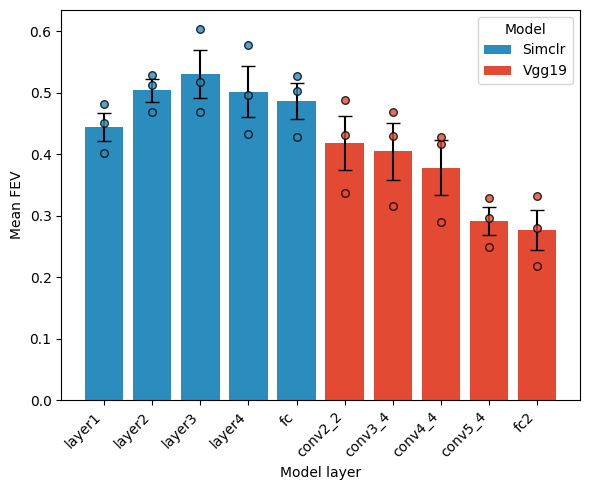

In [5]:
plot_mean_fev(avg_metrics, df_pcs, remove_gabor=True)